### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
# import drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# display the CSV file into a Dataframe
ecom = pd.read_csv('The E-commerce Dataset.csv')
ecom.head()

# print the length of the data before removing the missing data.
print("Length of data before removing missing data:", len(ecom))

# counting number of Null values in each column before removing the missing data.
print("Null value counts in each column:")
print(ecom.isnull().sum())

Length of data before removing missing data: 20000
Null value counts in each column:
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64


In [3]:
# clean missing data in the records of gender/rating/helpfulness.
ecom_1 = ecom.dropna() # since rating, helpfulness and gender are three only columns contains missing data.

# clean missing data in the record of review whereas review contains 'none'
ecom_clean = ecom_1[ecom_1['review']!='none']

# print the length of the data after removing the missing data.
print("Length of data after removing missing data:", len(ecom_clean))

# counting number of Null values in each column after removing the missing data.
print("Null value counts in each column:")
print(ecom_clean.isnull().sum())

Length of data after removing missing data: 19916
Null value counts in each column:
userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [4]:
# Q2.1: Total number of unique users, unique reviews, unique items, and unique categories
unique_users = ecom_clean['userId'].unique()
unique_reviews = ecom_clean['review'].unique()
unique_items = ecom_clean['item'].unique()
unique_categories = ecom_clean['category'].unique()

print("Q2.1:")
print("Total number of unique users:", unique_users.size)
print("Total number of unique reviews:", unique_reviews.size)
print("Total number of unique items:", unique_items.size)
print("Total number of unique categories:", unique_categories.size)

Q2.1:
Total number of unique users: 8562
Total number of unique reviews: 19459
Total number of unique items: 89
Total number of unique categories: 9


In [15]:
# Q2.2: Descriptive statistics of all rating records
rating_stats = ecom_clean['rating'].describe()

print("Q2.2:")
print("Descriptive statistics of rating records:")
rating_stats

Q2.2:
Descriptive statistics of rating records:


count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [16]:
# Q2.3: Descriptive statistics of the number of items rated by different genders
item_bygender = ecom_clean.groupby('gender')['item'].count().reset_index(name='count')

print("Q2.3:")
print("Descriptive statistics of the number of items rated by different genders:")
item_bygender

Q2.3:
Descriptive statistics of the number of items rated by different genders:


,gender,count
0,F,9793
1,M,10123


In [17]:
item_bygender['count'].describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: count, dtype: float64

In [18]:
# Q2.4: Descriptive statistics of the number of ratings received by each item
rating_byitem = ecom_clean.groupby('item')['rating'].count().reset_index(name='count')

print("Q2.4:")
print("Descriptive statistics of the number of ratings received by each item:")
rating_byitem

Q2.4:
Descriptive statistics of the number of ratings received by each item:


,item,count
0,AOL (America Online),939
1,All Advantage,657
2,Alta Vista (by 1stUp),157
3,Amazon.com,240
4,American Airlines,185
...,...,...
84,Wendy's,210
85,What Lies Beneath,160
86,X-Men,245
87,X.com,173


In [19]:
rating_byitem['count'].describe()

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: count, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

Text(0, 0.5, 'Rating')

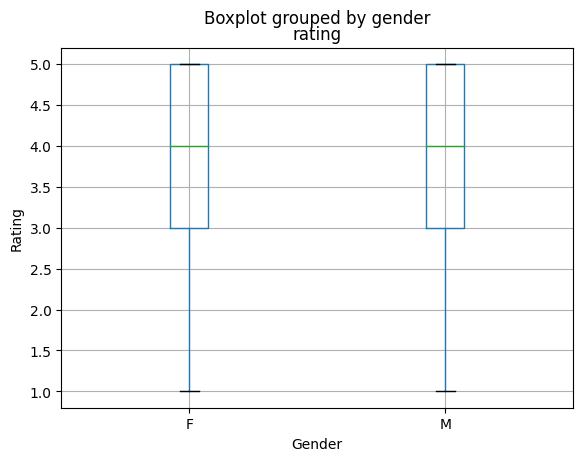

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create boxplots to visualize the distribution of ratings by gender
ecom_clean.boxplot('rating', by = 'gender')
plt.xlabel('Gender')
plt.ylabel('Rating')

**Correlation between gender and rating:** The boxplot  implies a minimal connection between gender and ratings, indicating that gender exerts negligible influence on the ratings.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Books'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Hotels & Travel'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Media'),
  Text(6, 0, 'Movies'),
  Text(7, 0, 'Online Stores & Services'),
  Text(8, 0, 'Personal Finance'),
  Text(9, 0, 'Restaurants & Gourmet')])

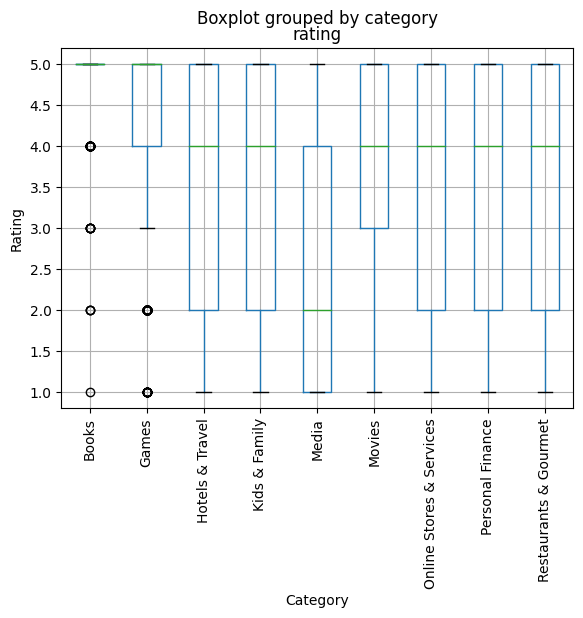

In [21]:
# Create boxplots to visualize the distribution of ratings by category
ecom_clean.boxplot('rating', by = 'category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)


**Correlation between category and ratings**: Overall, the distribution of ratings across different categories is relatively alike such as Hotels and Travel, Kids & Family, Online Stores & Service, Personal Finance, and Restaurants & Gourmet. However, items categorized as 'Media' tend to receive lower ratings compared to other categories. Conversely, items categorized as 'Game' exhibit less variability, with minimum ratings consistently at 4, in contrast to items in other categories which show greater variability with minimum ratings lower than 4. The influence of category on ratings surpasses that of gender, although its effect is relatively modest.

Text(0, 0.5, 'Rating')

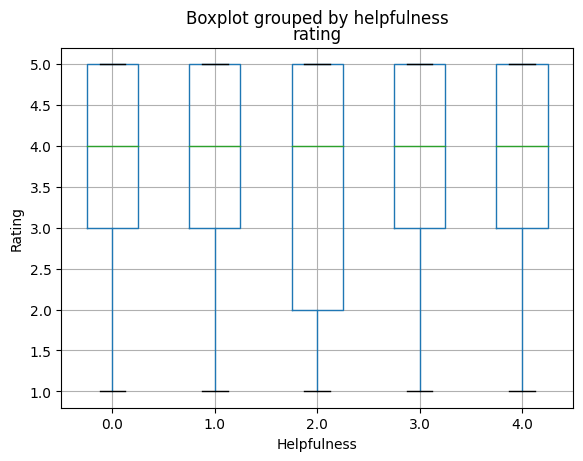

In [22]:
# Create boxplots to visualize the distribution of ratings by helpfulness
ecom_clean.boxplot('rating', by = 'helpfulness')
plt.xlabel('Helpfulness')
plt.ylabel('Rating')

**Correlation between helpfulness and ratings**: The boxplot suggests a minimal association between helpfulness and ratings, indicating that helpfulness has little to no impact on the ratings.

# **Summary of the data**
1. Within the dataset, there are ratings from 19,916 distinct users for 89 unique items (Q2.1), with ratings ranging from 1 to 5, scaled by 1. The average rating stands at approximately 3.7 (Q2.2), with over 50% of items having ratings of 4 or higher (Q2.2).

2. Users within the dataset are divided into two genders (male and female), with each gender providing ratings for an average of 9958 items (Q2.3). In fact, the number of ratings received from females is higher than that from males.

3. The items in the dataset are categorized into nine distinct groups (Books, Games, Hotels and Travel, Kids & Family, Media, Movies, Online Stores & Service, Personal Finance, and Restaurants & Gourmet), each receiving an average of 223 ratings.

4. The features, such as gender and category, exhibit low correlation with ratings, with gender displaying the weakest correlation. This suggests that inferring ratings based on these features is hard to achieve.

5. The dataset contains a limited number of missing values, totaling around 84 records.


#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [23]:
# Rule 1: Remove reviews with 'helpfulness' no more than 2
remove_outlier_ecom = ecom_clean[ecom_clean['helpfulness'] > 2]
print('The length of data after removing helpfulness: ', len(remove_outlier_ecom))

The length of data after removing helpfulness:  13643


In [24]:
# Rule 2: Remove users who rate less than 7 items
# Group users by their ids and count the number of their ratings
user_ratings_counts = remove_outlier_ecom.groupby('userId')['rating'].count().reset_index(name='count')
user_ratings_counts

,userId,count
0,0,3
1,1,1
2,2,2
3,3,2
4,4,7
...,...,...
6530,10802,2
6531,10803,1
6532,10804,1
6533,10805,4


In [25]:
# Identify users who rate no less than 7 items
userIds = user_ratings_counts[user_ratings_counts['count']>= 7]['userId'].tolist()
print(len(userIds))

267


In [26]:
# Remove records associated with outlier users
remove_outlier_ecom = remove_outlier_ecom[remove_outlier_ecom['userId'].isin(userIds)]

# Print the length of the data after cleaning
print("Length of data after cleaning:", len(remove_outlier_ecom))

Length of data after cleaning: 2741


In [27]:
# Rule 3: Remove items that receive less than 11 ratings
# Group items by their names and count the number of their ratings
item_counts = remove_outlier_ecom.groupby(['item'])['rating'].count().reset_index(name= 'count')
item_counts


,item,count
0,AOL (America Online),93
1,All Advantage,72
2,Alta Vista (by 1stUp),10
3,Amazon.com,18
4,American Airlines,19
...,...,...
84,Wendy's,35
85,What Lies Beneath,28
86,X-Men,48
87,X.com,19


In [28]:
# Identify items which has no less than 11 ratings
outlier_item = item_counts[item_counts['count']>= 11]['item'].tolist()
print(len(outlier_item))


82


In [29]:
# Remove records associated with outlier items
remove_outlier_ecom = remove_outlier_ecom[remove_outlier_ecom['item'].isin(outlier_item)]

print("Length of data after cleaning:", len(remove_outlier_ecom))

Length of data after cleaning: 2685


In [30]:
# Export the processed data as csv file
remove_outlier_ecom.to_csv('Processed E-commerce Dataset.csv', index = False)